# DIABETES CHECK  MACHINE LEARNING


### An Exploratory Data Visualization and Analysis

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat.

As of 2015, 30.3 million people in the United States, or 9.4 percent of the population, had diabetes. More than 1 in 4 of them didn’t know they had the disease. Diabetes affects 1 in 4 people over the age of 65. About 90-95 percent of cases in adults are type 2 diabetes.

In this project, I will analyze the factors that is related to Diabetes and with Machine learning I will Check the probility of being Diabetic.


### Programming Language and Modules Included in This Project:

    • PROGRAMING LANGUAGE - Python 3(3.7.9)
    • PYTHON LIBRARIES - Numpy, Pandas, Matplotlib, Seaborn

Dataset Source - UCI Machine Learning Repository

Author - Tirthankar Halder

Project Done - 19th july 2020 to 22th july

In [7]:
#Importing Requird Module
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\TIRTHANKAR HALDER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
#Reading the us dataset from UCI Mcahine Learing Repository
di=pd.read_csv('diabetes.csv')

### Checking The Detailed Information Of Dataset

In [9]:
di.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## Adding Column Names
As We can see the Dataset doesn't has columns name, we have to add column names manually. we have to collect column names from website.

In [10]:
column_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
di=pd.read_csv('diabetes.csv',names=column_names)

In [11]:
di.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
di.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
di.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
di.shape

(768, 9)

In [16]:
di.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here, We can see that there are no missing values in this Dataset, it will be easier to analyze.

In [17]:
di.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

# DATA VISUALIZATION

<AxesSubplot:xlabel='Outcome', ylabel='count'>

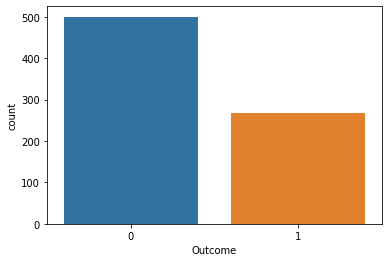

In [18]:
sns.countplot(di['Outcome'])

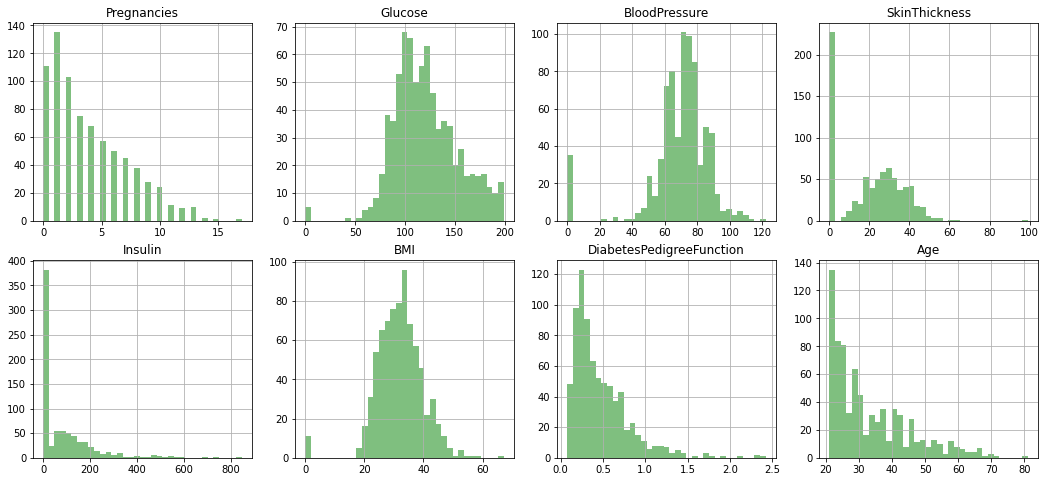

In [19]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    di[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  

### Collecting Required Features

In [20]:
print("Total : ",di[di.Pregnancies==0].shape[0])

Total :  111


In [21]:
print(di[di.Pregnancies==0].groupby('Outcome')['Age'].count())

Outcome
0    73
1    38
Name: Age, dtype: int64


In [22]:
print("Total : ",di[di.Glucose==0].shape[0])

Total :  5


In [23]:
print(di[di.Glucose==0].groupby('Outcome')['Age'].count())

Outcome
0    3
1    2
Name: Age, dtype: int64


In [24]:
print("Total : ",di[di.BloodPressure==0].shape[0])


Total :  35


In [25]:
print(di[di.BloodPressure==0].groupby('Outcome')['Age'].count())

Outcome
0    19
1    16
Name: Age, dtype: int64


In [26]:
di_f=di[(di.Pregnancies!=0) & (di.Glucose!=0) & (di.BloodPressure!=0)]

In [27]:
print(di_f.shape)

(627, 9)


## Selecting Required Features For Model Prediction

In [28]:
feature_names=['Pregnancies', 'Glucose', 'BloodPressure']

In [29]:
X = di_f[feature_names]
Y = di_f.Outcome

### KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier


In [31]:
models = []
models.append(('KNN', KNeighborsClassifier()))


In [72]:
from sklearn.model_selection import train_test_split


Xtrain,Xtest,ytrain,ytest = train_test_split(X, Y, stratify = di_f.Outcome,test_size=0.3,random_state=6)

In [34]:
kmodel=KNeighborsClassifier(n_neighbors=5)

In [35]:
kmodel.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Model Prediction

In [36]:
kmodel.score(Xtrain,ytrain)

0.7945205479452054

In [37]:
kmodel.predict(Xtest)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [38]:
tr_acc=[]
ts_acc=[]

for i in range(1,50):
    kms=KNeighborsClassifier(n_neighbors=i)
    
    kms.fit(Xtrain,ytrain)
    tr_acc.append(kms.score(Xtrain,ytrain))
    ts_acc.append(kms.score(Xtest,ytest))

In [39]:
tr_acc

[0.997716894977169,
 0.8401826484018264,
 0.8561643835616438,
 0.7990867579908676,
 0.7945205479452054,
 0.7990867579908676,
 0.7922374429223744,
 0.7922374429223744,
 0.7968036529680366,
 0.7831050228310502,
 0.7945205479452054,
 0.7876712328767124,
 0.7831050228310502,
 0.776255707762557,
 0.7853881278538812,
 0.7831050228310502,
 0.7785388127853882,
 0.7831050228310502,
 0.7785388127853882,
 0.776255707762557,
 0.7785388127853882,
 0.7671232876712328,
 0.7648401826484018,
 0.7648401826484018,
 0.7808219178082192,
 0.769406392694064,
 0.771689497716895,
 0.7671232876712328,
 0.7602739726027398,
 0.769406392694064,
 0.7648401826484018,
 0.769406392694064,
 0.769406392694064,
 0.7648401826484018,
 0.7625570776255708,
 0.7648401826484018,
 0.7602739726027398,
 0.7579908675799086,
 0.7625570776255708,
 0.7625570776255708,
 0.7602739726027398,
 0.7557077625570776,
 0.7579908675799086,
 0.7625570776255708,
 0.7648401826484018,
 0.7648401826484018,
 0.7602739726027398,
 0.771689497716895,
 

In [40]:
ts_acc

[0.6137566137566137,
 0.6772486772486772,
 0.6772486772486772,
 0.7142857142857143,
 0.6825396825396826,
 0.6984126984126984,
 0.7142857142857143,
 0.6984126984126984,
 0.7037037037037037,
 0.708994708994709,
 0.6878306878306878,
 0.7248677248677249,
 0.7195767195767195,
 0.7142857142857143,
 0.7248677248677249,
 0.7301587301587301,
 0.7407407407407407,
 0.746031746031746,
 0.7513227513227513,
 0.7513227513227513,
 0.746031746031746,
 0.746031746031746,
 0.746031746031746,
 0.746031746031746,
 0.746031746031746,
 0.746031746031746,
 0.7407407407407407,
 0.7513227513227513,
 0.7566137566137566,
 0.7513227513227513,
 0.7513227513227513,
 0.746031746031746,
 0.746031746031746,
 0.7513227513227513,
 0.746031746031746,
 0.7513227513227513,
 0.7513227513227513,
 0.746031746031746,
 0.746031746031746,
 0.746031746031746,
 0.7407407407407407,
 0.746031746031746,
 0.746031746031746,
 0.746031746031746,
 0.7407407407407407,
 0.7407407407407407,
 0.7407407407407407,
 0.7407407407407407,
 0.740740

<function matplotlib.pyplot.show(close=None, block=None)>

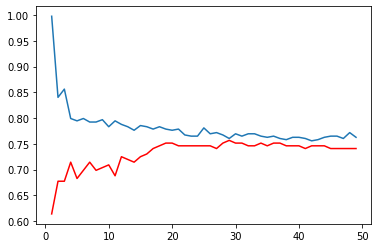

In [41]:
plt.plot(range(1,50),tr_acc)
plt.plot(range(1,50),ts_acc,color='red')
plt.show

### RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(random_state=0,n_estimators=100)

In [64]:
rfc.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
rfc_train=rfc.score(xtrain,ytrain)
print("Accuracy on Training Set:",rfc_train)

Accuracy on Training Set: 0.997716894977169


In [66]:
rfc_test=rfc.score(Xtest,ytest)
print("Accuracy on Testing Set:",rfc_test)

Accuracy on Training Set: 0.6825396825396826


### LogisticRegression

In [70]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [80]:
lr.fit(Xtrain,ytrain)

C:\Users\TIRTHANKAR HALDER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
lr_train=lr.score(Xtrain,ytrain)
print("Accuracy on Training Set:",lr_train)


Accuracy on Training Set: 0.7602739726027398


In [82]:
lr_test=lr.score(Xtest,ytest)
print("Accuracy on Training Set:",lr_test)

Accuracy on Training Set: 0.7407407407407407


### DecisionTreeClassifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=0)

dtc.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [87]:
dtc_train=dtc.score(Xtrain,ytrain)
print("Accuracy on Training Set:",dtc_train)


dtc_test=dtc.score(Xtest,ytest)
print("Accuracy on Training Set:",dtc_test)

Accuracy on Training Set: 0.997716894977169
Accuracy on Training Set: 0.6296296296296297


In [88]:
dtc=DecisionTreeClassifier(random_state=0,max_depth=3)

dtc.fit(Xtrain,ytrain)

dtc_train=dtc.score(Xtrain,ytrain)
print("Accuracy on Training Set:",dtc_train)


dtc_test=dtc.score(Xtest,ytest)
print("Accuracy on Training Set:",dtc_test)

Accuracy on Training Set: 0.771689497716895
Accuracy on Training Set: 0.7407407407407407


In [90]:
dtc.feature_importances_

array([0.06001602, 0.8314834 , 0.10850059])

# Observations and Insights : Diabetes Prediction

##### FROM THE VARIOUS METHODS AND THEIR OUTPUTS WE GOT THE FOLLOWING INSIGHTS :



Thank You!